In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')

In [2]:
extension = glob.glob('*csv')
print(extension)
                      

['Abuja_Branch.csv', 'Lagos_Branch.csv', 'Port_Harcourt_Branch.csv']


In [3]:
csv_files = (pd.read_csv(file) for file in extension)
df = pd.concat(csv_files, ignore_index = True)

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


In [5]:
df.shape

(1000, 17)

In [6]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [7]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905e+00,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,6.131498e-14,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905e+00,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905e+00,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905e+00,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.00000


# The average Quantity sold was about 6 items which had a total average cost of # 116,268

# we also had a max quantity of 10 items sold to a cudtomer which brought a total amount of # 375,354

In [8]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [10]:
df.duplicated().sum()

0

In [11]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] =  pd.to_datetime(df['Time'])


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [13]:
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2019-02-20,2023-03-08 13:27:00,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2019-02-06,2023-03-08 18:07:00,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,2019-03-09,2023-03-08 17:03:00,Cash,36734.4,4.761905,1836.72,6.8


In [14]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [15]:
df['Hours'] = df['Time'].dt.hour

In [16]:
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hours
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,...,2023-03-08 13:27:00,Card,59227.2,4.761905,2961.36,5.9,20,2,2019,13
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,...,2023-03-08 18:07:00,Epay,20851.2,4.761905,1042.56,4.5,6,2,2019,18
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,...,2023-03-08 17:03:00,Cash,36734.4,4.761905,1836.72,6.8,9,3,2019,17


In [17]:
df['Hours'].unique()

array([13, 18, 17, 16, 15, 10, 12, 19, 14, 11, 20], dtype=int64)

In [18]:
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

In [19]:
cat_obj = df.select_dtypes(include = object)
cat_obj

,Invoice ID,Branch,City,Customer type,Gender,Product line,Payment
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,Card
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,Epay
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,Cash
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,Cash
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,Epay
...,...,...,...,...,...,...,...
995,148-41-7930,C,Port Harcourt,Normal,Male,Health and beauty,Cash
996,189-40-5216,C,Port Harcourt,Normal,Male,Electronic accessories,Cash
997,267-62-7380,C,Port Harcourt,Member,Male,Electronic accessories,Epay
998,652-49-6720,C,Port Harcourt,Member,Female,Electronic accessories,Epay


In [20]:
df['Branch'].unique().tolist()

['B', 'A', 'C']

In [21]:
def get_unique_values(df):
    for col in df:
        if df[col].nunique() < 13:
            print('--'* 20)
            print(col)
            print('--'* 20)
            print(df[col].value_counts(normalize = True).round(2).to_frame())
            print('\n')

In [22]:
get_unique_values(cat_obj)

----------------------------------------
Branch
----------------------------------------
   Branch
A    0.34
B    0.33
C    0.33


----------------------------------------
City
----------------------------------------
               City
Lagos          0.34
Abuja          0.33
Port Harcourt  0.33


----------------------------------------
Customer type
----------------------------------------
        Customer type
Member            0.5
Normal            0.5


----------------------------------------
Gender
----------------------------------------
        Gender
Female     0.5
Male       0.5


----------------------------------------
Product line
----------------------------------------
                        Product line
Fashion accessories             0.18
Food and beverages              0.17
Electronic accessories          0.17
Sports and travel               0.17
Home and lifestyle              0.16
Health and beauty               0.15


----------------------------------------
Pay

In [23]:
df['City'].value_counts(normalize = True).round(2).to_frame()

,City
Lagos,0.34
Abuja,0.33
Port Harcourt,0.33


In [24]:
df.groupby('City').agg(['mean', 'sum']).round(2)

Unit price            Quantity         Tax 5%              \
                    mean        sum     mean   sum     mean         sum   
City                                                                      
Abuja           20037.34  6652396.8     5.48  1820  5483.53  1820531.52   
Lagos           19721.11  6705176.4     5.47  1859  5354.64  1820577.78   
Port Harcourt   20379.25  6684393.6     5.58  1831  5778.85  1895463.54   

                   Total                    cogs              ... Rating  \
                    mean          sum       mean         sum  ...   mean   
City                                                          ...          
Abuja          115154.10  38231161.92  109670.57  36410630.4  ...   6.82   
Lagos          112447.45  38232133.38  107092.81  36411555.6  ...   7.03   
Port Harcourt  121355.90  39804734.34  115577.05  37909270.8  ...   7.07   

                         Day       Month         Year          Hours        
                  sum   mean   sum  mean  sum    mean     sum   mean   sum  
City                                                                        
Abuja          2263.6  15.27  5068  2.00  665  2019.0  670308  15.15  5029  
Lagos          2389.2  15.39  5232  2.02  688  2019.0  686460  14.67  4987  
Port Harcourt  2319.9  15.11  4956  1.95  640  2019.0  662232  14.92  4894  

[3 rows x 24 columns]

In [25]:
df.groupby('City')['gross income'].sum().sort_values(ascending = False)

City
Port Harcourt    1895463.54
Lagos            1820577.78
Abuja            1820531.52
Name: gross income, dtype: float64

<Figure size 360x360 with 0 Axes>

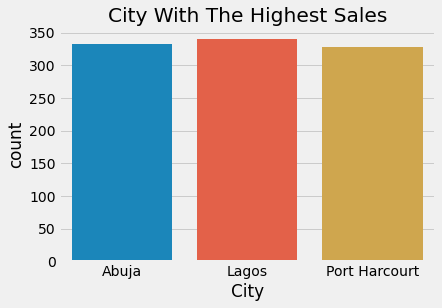

<Figure size 360x360 with 0 Axes>

In [26]:
sns.countplot(x = df['City'])
plt.title('City With The Highest Sales')
plt.figure(figsize = (5,5))

<Figure size 360x360 with 0 Axes>

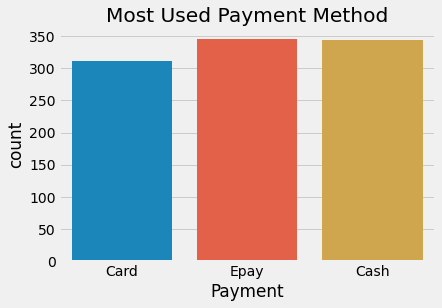

<Figure size 360x360 with 0 Axes>

In [27]:
sns.countplot(x = df['Payment'])
plt.title('Most Used Payment Method')
plt.figure(figsize = (5,5))

Text(0.5, 1.0, 'The Most Used Product line')

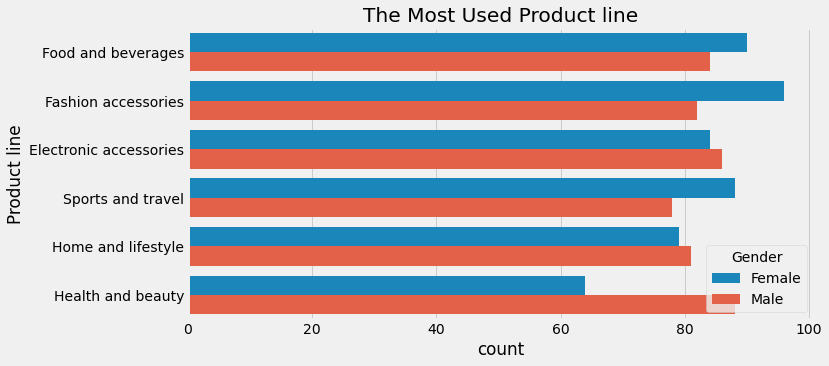

In [28]:
plt.figure(figsize = (10,5))
sns.countplot(y = df['Product line'], hue = df['Gender'])
plt.title('The Most Used Product line')


Text(0.5, 1.0, 'The Most Used Product line')

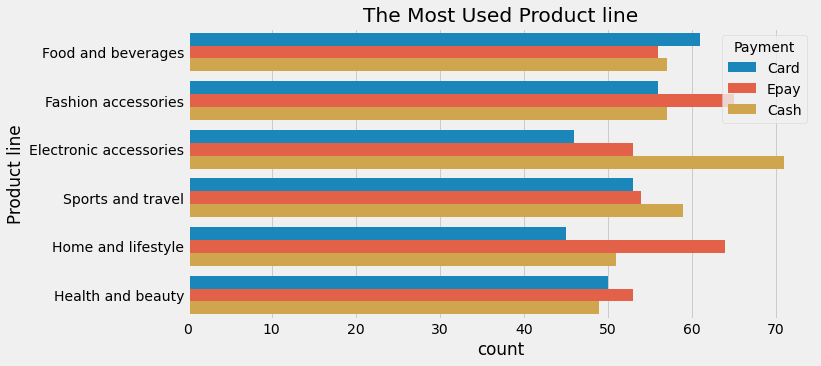

In [29]:
plt.figure(figsize = (10,5))
sns.countplot(y = df['Product line'], hue = df['Payment'])
plt.title('The Most Used Product line')


Text(0.5, 1.0, 'Payment Channel For Each Branch')

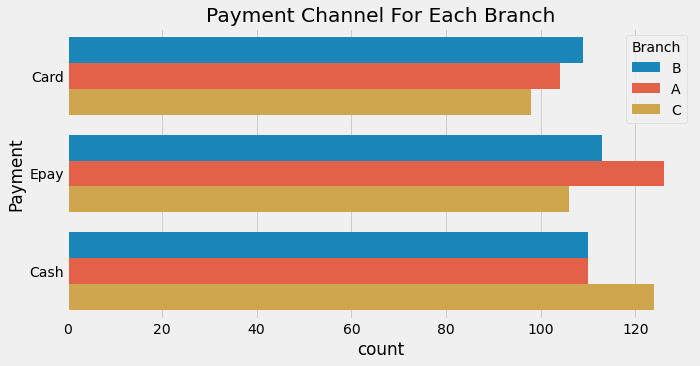

In [30]:
plt.figure(figsize = (10,5))
sns.countplot(y = df['Payment'], hue = df['Branch'])
plt.title('Payment Channel For Each Branch')


Text(0.5, 1.0, 'Average Gross Income Per Month')

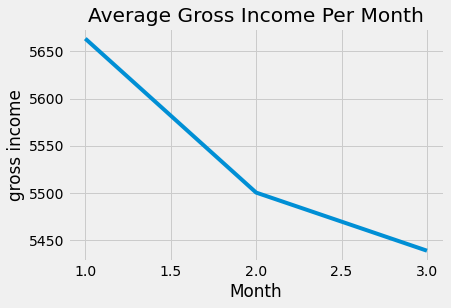

In [31]:
sns.lineplot(x = 'Month', y = 'gross income', data = df, ci = None)
plt.title('Average Gross Income Per Month')

In [32]:
df.Rating.min()

4.0

In [33]:
ranges = [0, 4.5, 7, np.inf]
group_names = ['Bad Experience', 'Satisfied', 'Very Satisfied']
df['Rating_Group'] = pd.cut(df['Rating'], bins = ranges, labels = group_names)

In [34]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hours,Rating_Group
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,...,Card,59227.2,4.761905,2961.36,5.9,20,2,2019,13,Satisfied
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,...,Epay,20851.2,4.761905,1042.56,4.5,6,2,2019,18,Bad Experience
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,...,Cash,36734.4,4.761905,1836.72,6.8,9,3,2019,17,Satisfied
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,...,Cash,202435.2,4.761905,10121.76,4.5,15,1,2019,16,Bad Experience
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,...,Epay,29016.0,4.761905,1450.80,4.4,11,3,2019,15,Bad Experience


<AxesSubplot:xlabel='Rating_Group', ylabel='count'>

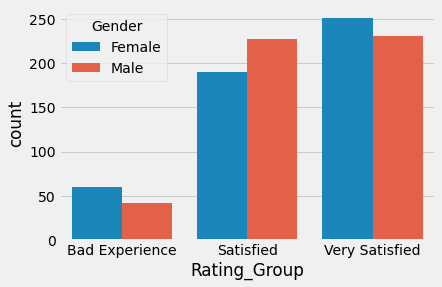

In [35]:
sns.countplot(x = df['Rating_Group'], hue = df['Gender'])

<AxesSubplot:xlabel='Rating_Group', ylabel='count'>

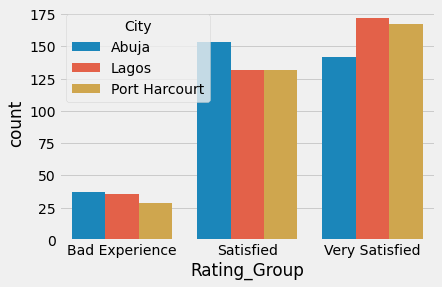

In [36]:
sns.countplot(x = df['Rating_Group'], hue = df['City'])

# Assignment
* work on the salary data set
* decision and summary on the this data and the salary data set
* ecommerce(additional mark)

In [37]:
df.head(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hours,Rating_Group
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,...,Card,59227.2,4.761905,2961.36,5.9,20,2,2019,13,Satisfied
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,...,Epay,20851.2,4.761905,1042.56,4.5,6,2,2019,18,Bad Experience
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,...,Cash,36734.4,4.761905,1836.72,6.8,9,3,2019,17,Satisfied


<AxesSubplot:xlabel='Rating', ylabel='Branch'>

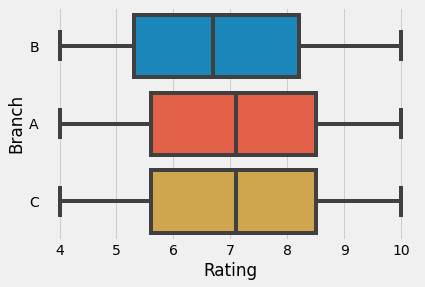

In [38]:
sns.boxplot(x = 'Rating', y = 'Branch', data = df)

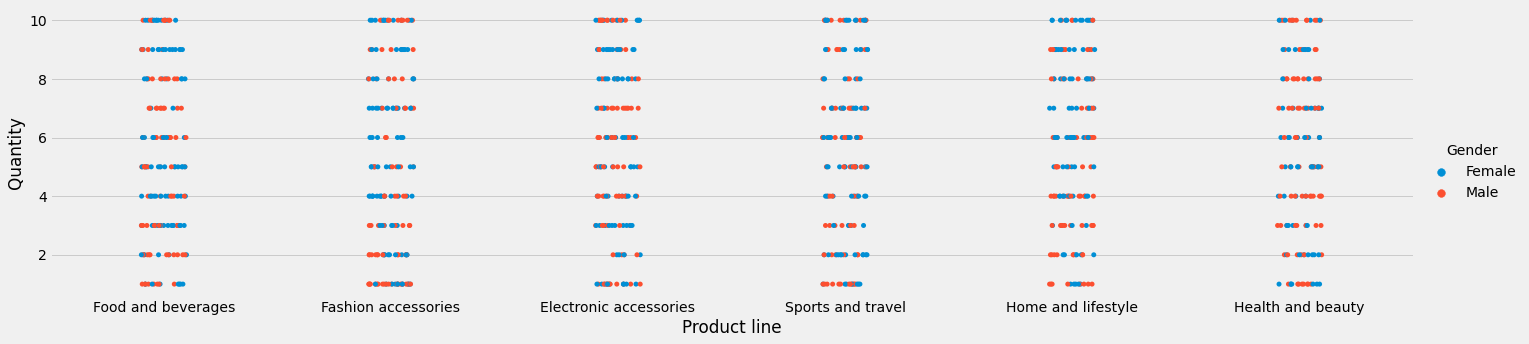

In [39]:
sns.catplot(x = 'Product line', y = 'Quantity', data = df, hue = 'Gender',aspect = 4)

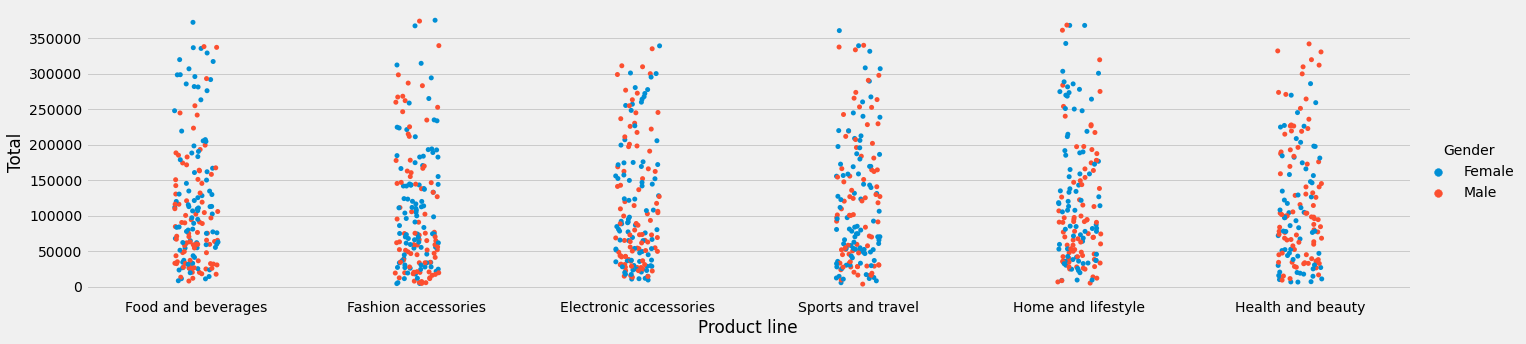

In [40]:
sns.catplot(x = 'Product line', y = 'Total', data = df, hue = 'Gender',aspect = 4)

# it has been observed that the females had the highest purchase of food and beverages, fashion accessories..... both genders had almost the same purchase of electronic accesories and home and lifestyle but the males had the highest purchase of health abd beauty

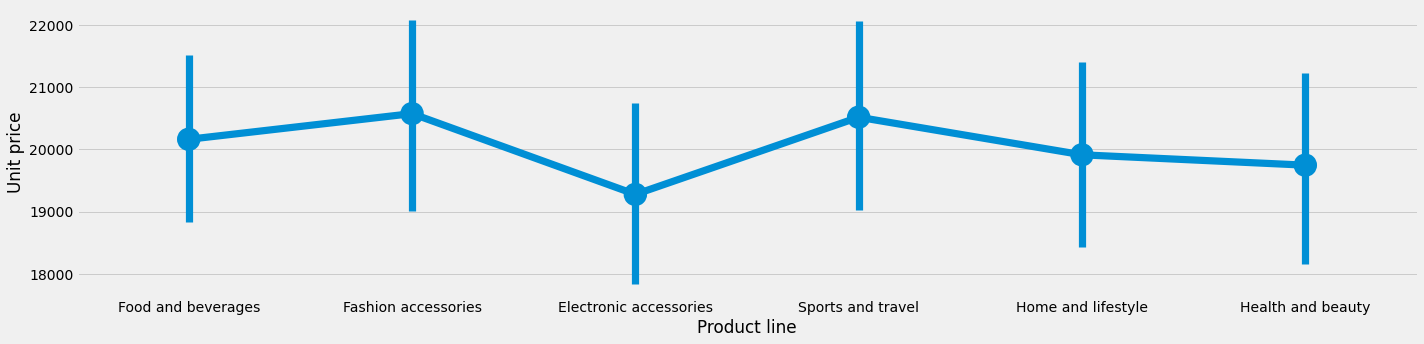

In [42]:
sns.catplot(x = 'Product line', y = 'Unit price', data = df, kind = 'point',aspect = 4)

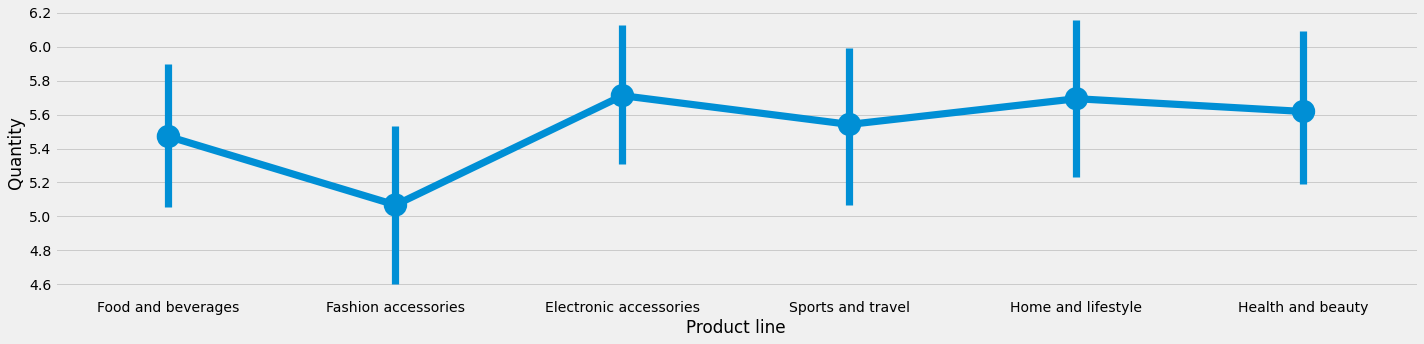

In [43]:
sns.catplot(x = 'Product line', y = 'Quantity', data = df, kind = 'point',aspect = 4)